In [2]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [3]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()
       
        m2      = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm2, ym2  = m2(LON, LAT)
        im2     = m2.plot(xm2,ym2,'.', color='k',linewidth=2.)

        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [149]:
def investigate_traj(figsize, proj, nb_traj, hfacc_level):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    import cmocean
    
    fig     = plt.figure(figsize=figsize)
    
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="l")
    elif proj=='merc':
        m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
    

    
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the salinity
    xm, ym  = m(Lon, Lat)
    im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
    cbar    = m.colorbar(im,pad='10%')
    cbar.set_label('Salinity', fontsize =16)
        
    # Plot all the traj
    for p in nb_traj: 
        xm, ym  = m(LON[:,p], LAT[:,p])
        im      = m.plot(xm, ym, '-', color='orange',linewidth=0.4)
        xm, ym  = m(LON[0,p], LAT[0,p])
        im      = m.plot(xm, ym, '.', color='yellow',linewidth=2.)
        xm, ym  = m(LON[-1,p], LAT[-1,p])
        im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
        
    m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1])
    #plt.title('10 000 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
    #plt.savefig(path_save + title_save, bbox_inches='tight')

In [4]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [5]:
# Mercator salinity
mean_Salt_surf = pickle_load('mean_Salt_surf_2', '/data/ebent', verbose=False)
mean_Salt_30     = pickle_load('mean_Salt_30_2', '/data/ebent', verbose=False)
mean_Salt_100   = pickle_load('mean_Salt_100_2', '/data/ebent', verbose=False)
mean_Salt_200   = pickle_load('mean_Salt_200_2', '/data/ebent', verbose=False)
mean_Salt_500   = pickle_load('mean_Salt_500_2', '/data/ebent', verbose=False)

# Mercator temperature
mean_Theta_surf = pickle_load('mean_Theta_surf_2', '/data/ebent', verbose=False)
mean_Theta_30     = pickle_load('mean_Theta_30_2', '/data/ebent', verbose=False)
mean_Theta_100   = pickle_load('mean_Theta_100_2', '/data/ebent', verbose=False)
mean_Theta_200   = pickle_load('mean_Theta_200_2', '/data/ebent', verbose=False)
mean_Theta_500   = pickle_load('mean_Theta_500_2', '/data/ebent', verbose=False)

In [6]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

In [137]:
# Mercator grid for salinity
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

lat     = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -30,12
lon     = file1.variables['lon'][lon_min:lon_max] # de 150,04 a 269,95
Lon, Lat = np.meshgrid(lon,lat)

In [8]:
# This is hFacC for the SOUTHERN HEMISPHERE

file_h = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file_h.get('hFacC')
hFacC = np.array(hFacC)
Xf = file_h.get('XC')
Xf = np.array(Xf)
Yf = file_h.get('YC')
Yf = np.array(Yf)

In [9]:
# On selectionne la bonne taille de hFacC == taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [76]:
depth = file1.variables['depth'][:]

In [78]:
for i in range(len(depth)):
    print i, depth[i]

0 1.0
1 3.09999990463
2 5.40000009537
3 7.90000009537
4 10.6000003815
5 13.5500001907
6 16.75
7 20.2000007629
8 24.0
9 28.25
10 32.75
11 37.5
12 42.5
13 47.5
14 52.5
15 57.5
16 62.5
17 67.5
18 72.5
19 77.5
20 82.5
21 87.5
22 92.5
23 97.5
24 102.5
25 107.5
26 112.5
27 117.5
28 122.5
29 127.5
30 132.5
31 137.5
32 143.0
33 149.5
34 157.0
35 165.5
36 175.0
37 185.0
38 195.0
39 205.0
40 215.0
41 225.0
42 235.0
43 245.0
44 255.0
45 265.0
46 275.0
47 285.0
48 295.0
49 306.0
50 319.0
51 334.0
52 351.0
53 370.0
54 391.0
55 413.5
56 437.5
57 462.5
58 487.5
59 512.5
60 537.5
61 564.0
62 594.0
63 630.0
64 675.0
65 725.0
66 775.0
67 825.0
68 875.0
69 925.0
70 975.0
71 1025.0
72 1075.0
73 1125.0
74 1182.5
75 1257.5
76 1350.0
77 1450.0
78 1550.0
79 1650.0
80 1750.0
81 1850.0
82 1950.0
83 2060.0
84 2190.0
85 2340.0
86 2510.0
87 2700.0
88 2900.0
89 3100.0
90 3300.0
91 3500.0
92 3700.0
93 3900.0
94 4100.0
95 4300.0
96 4500.0
97 4700.0
98 4900.0
99 5100.0
100 5300.0
101 5500.0
102 5700.0
103 5900.0


***

In [9]:
path = '/data/ebent/Octopus/output/10_4parti_2/'

DEP = pickle_load('DEP_10_4', path, verbose=False)
LAT = pickle_load('LAT_10_4', path, verbose=False)
LON = pickle_load('LON_10_4', path, verbose=False)

z = pickle_load('z_10_4', path, verbose=False)
y = pickle_load('y_10_4', path, verbose=False)
x = pickle_load('x_10_4', path, verbose=False)

# Plots

# Experiment 2_100parti_1 

In [51]:
run Octopus/Octopus-master/scripts/p_xy.py

data has 180 records
glued data : 2_100PARTI_0001_0002.XYZ.0000000001.0000001801.data
location of data : /data/ebent/Octopus/output/2_100_parti_1/


In [52]:
LON = lon
LAT = lat

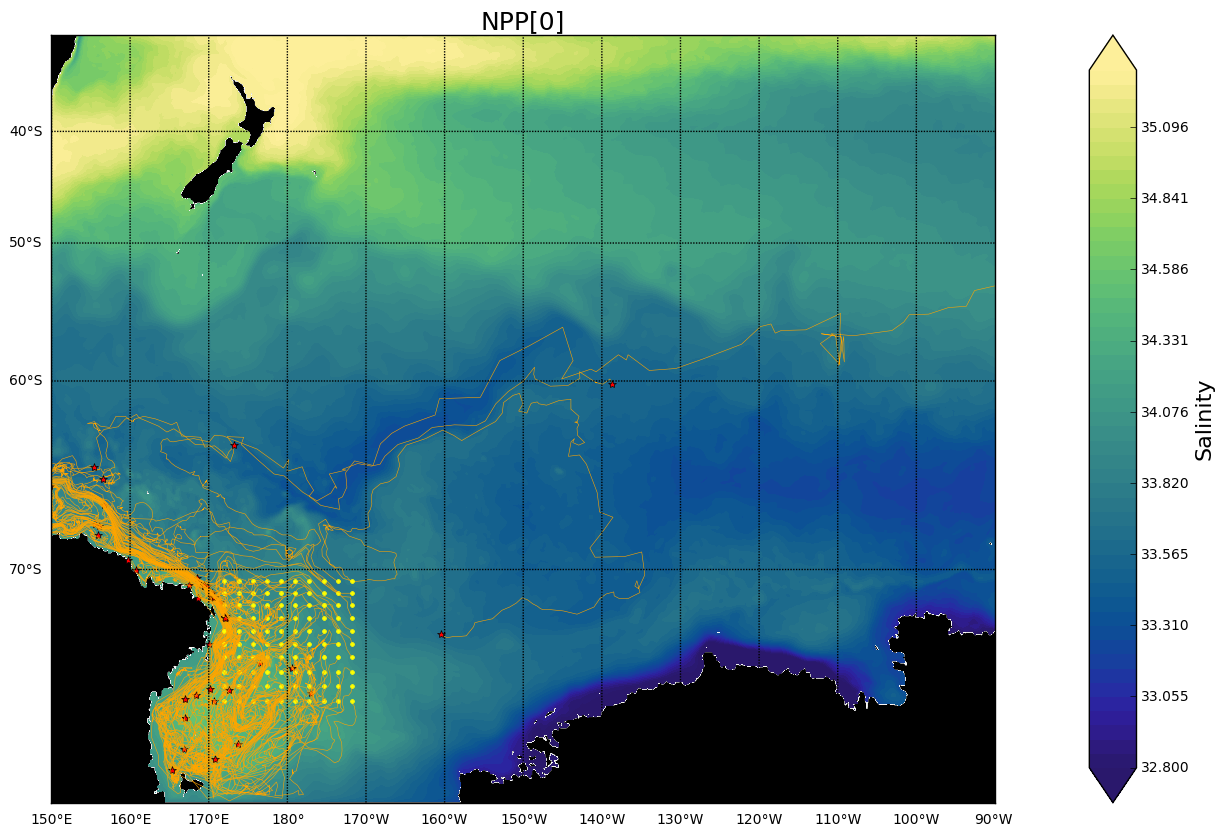

In [49]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(100), hfacc_level=9)
plt.title('NPP[0]', fontsize=18)

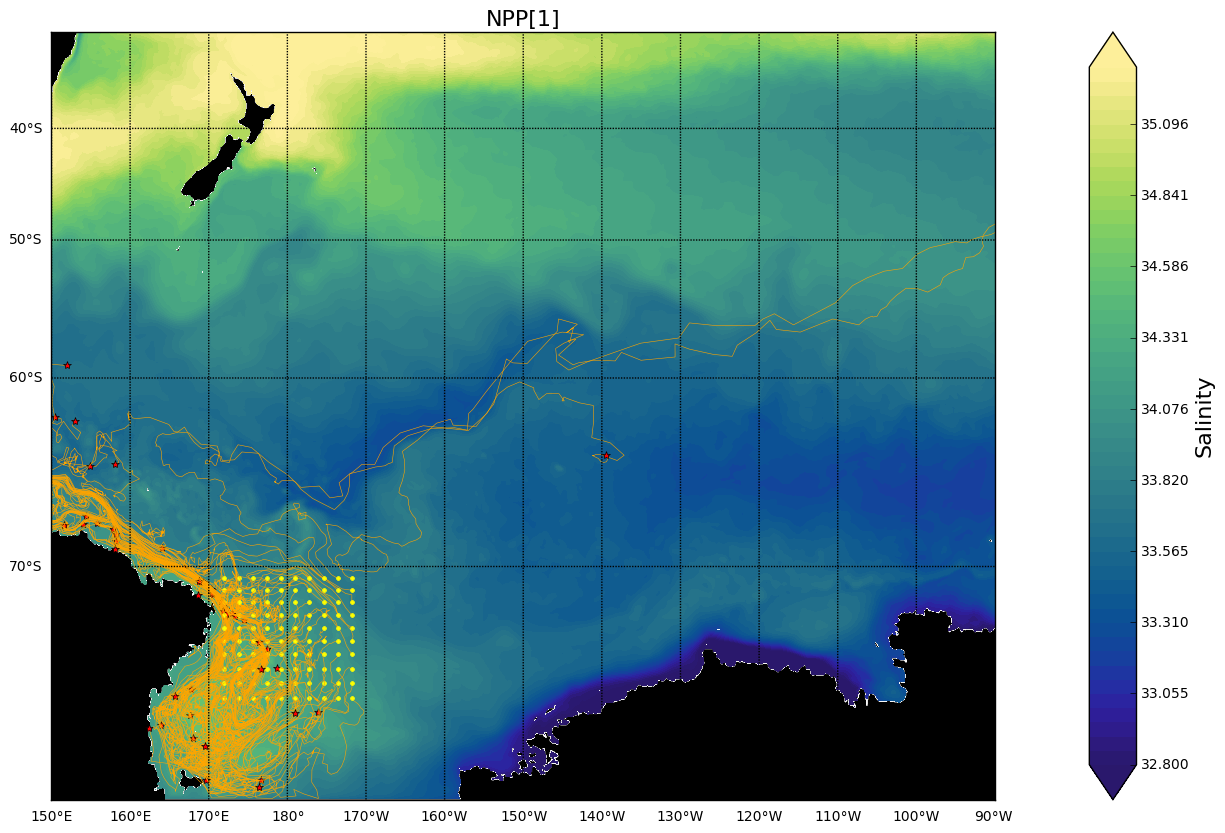

In [53]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(100), hfacc_level=9)
plt.title('NPP[1]', fontsize=16)

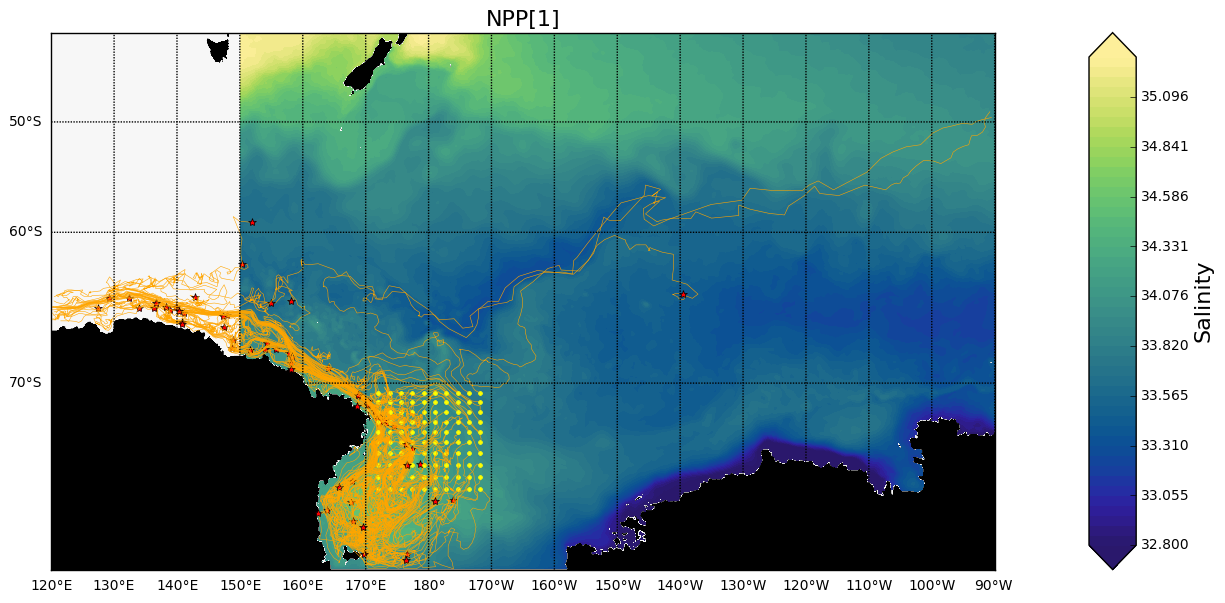

In [150]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(100), hfacc_level=9)
plt.title('NPP[1]', fontsize=16)

### Investigating a few particles that go on hfacc==0

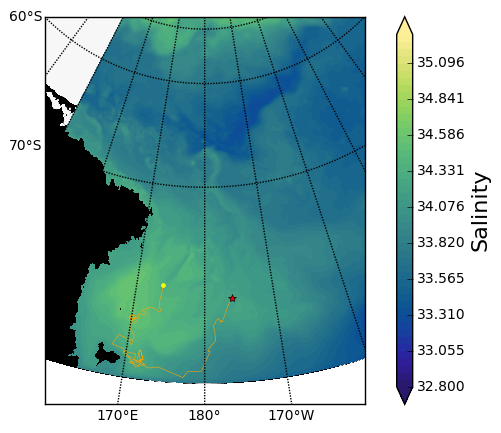

In [152]:
investigate_traj(figsize=(7,5), proj='lamb', nb_traj=range(1,2), hfacc_level=63)

***

***

# Mettre un mask sur les traj

Il a fallut mettre hFacC sur la même taille que mercator, on l'appelle hfacc

In [153]:
run /home/ebent/Octopus/Octopus-master/scripts/p_xy.py

data has 180 records
glued data : 2_100PARTI_0001_0002.XYZ.0000000001.0000001801.data
location of data : /data/ebent/Octopus/output/2_100_parti_1/


In [154]:
LON = lon
LAT = lat
DEP = dep

Ce run me donne : lon, lat, dep (pos en degrés) et xround, yround, zround (pos en indices dans le domaine du model que j'appelle "bigger domain")

In [155]:
# On selectionne la bonne taille de hFacC == taille de "bigger domain"

load_path2= '/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
file1     = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [156]:
LON = np.ma.masked_array(lon, mask=False)
LAT = np.ma.masked_array(lat, mask=False)
DEP = np.ma.masked_array(dep, mask=False)

x = np.ma.masked_array(xround, mask=False)
y = np.ma.masked_array(yround, mask=False)
z = np.ma.masked_array(zround, mask=False)

Mettre un mask sur LAT puis LON que l'on reproduira sur les autres variables

In [158]:
# Mask les parti qui sortent du domaine en latitude (sud et nord)

LAT = np.ma.masked_where(LAT < YC[0], LAT) # de -77,99 a -40,05
LAT = np.ma.masked_where(LAT > YC[-1], LAT)

print(YC[0], YC[-1])

(-77.9913330078125, -40.055816650390625)


In [159]:
LON.mask = LAT.mask

In [160]:
# Mask les parti qui sortent du domaine en longitude (est et ouest)

LON = np.ma.masked_where(LON < XC[0], LON) # de 120,04 a 270,04
LON = np.ma.masked_where(LON > XC[-1], LON)

print(XC[0], XC[-1])

(120.04166412353516, 270.04165649414062)


### Here I mask all time steps after the first LON.mask[t,p]==True for each parti

In [67]:
# Mask toutes les pos des partis une fois que leur premier temps t a été masqué

for p in range(LON.shape[1]):
    for t in range(LON.shape[0]):
        if LON.mask[t,p]==True:
            LON.mask[t:,p]=True
            break
            #print t, p

### Here I put a mask on hfacc==0

In [143]:
for p in range(z.shape[1]):
    for t in range(z.shape[0]):
        if LON.mask[t,p]==True: # changed z ton LON here, should work next time I run it
            continue
        if hfacc[z[t,p], y[t,p], x[t,p]]==0.:
            print t,p
            #LON.mask[t:,p]=True

39 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 1
128 1
1

In [118]:
z[90:,1]

masked_array(data = [63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63
 63 63 63 63 63 63 63 63 63 63 63 63 63 63 63],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False],
       fill_value = 999999)

In [119]:
z[39:,3]

masked_array(data = [49 52 53 53 53 53 52 52 51 51 50 52 55 53 50 48 49 47 38 44 50 47 47 49 49
 53 54 53 55 51 65 65 65 65 65 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66
 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66 66],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False

In [120]:
z[90:,4]

masked_array(data = [65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False],
       fill_value = 999999)

In [121]:
z[104:,5]

masked_array(data = [57 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56
 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56
 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56 56
 56],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False],
       fill_value = 999999)

In [122]:
z[59:,6]

masked_array(data = [56 56 56 56 56 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False

In [123]:
z[93:,62]

masked_array(data = [44 43 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True],
       fill_value = 999999)

In [131]:
LON[93:,62]

masked_array(data = [120.05520629882812 120.04444122314453 -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True],
       fill_value = 1e+20)

### Here I mask all time steps after the first LON.mask[t,p]==True for each parti AGAIN

In [20]:
# Mask toutes les pos des partis une fois que leur premier temps t a été masqué

for p in range(LON.shape[1]):
    for t in range(LON.shape[0]):
        if LON.mask[t,p]==True:
            LON.mask[t:,p]=True
            break

On applique le mask de LON pour les autres variables

In [68]:
# Make sure all pos have the same mask
LAT.mask = LON.mask
DEP.mask = LON.mask

x.mask = LON.mask
y.mask = LON.mask
z.mask = LON.mask

In [22]:
path = '/data/ebent/Octopus/output/10_4parti_2/'

pickle_save('DEP_10_4', path, DEP)
pickle_save('LAT_10_4', path, LAT)
pickle_save('LON_10_4', path, LON)

pickle_save('z_10_4', path, z)
pickle_save('y_10_4', path, y)
pickle_save('x_10_4', path, x)

('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/DEP_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/LAT_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/LON_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/z_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/y_10_4.npy')
('saved at : ', '/data/ebent/Octopus/output/10_4parti_2/x_10_4.npy')


In [23]:
path = '/data/ebent/Octopus/output/10_4parti_2/'

DEP = pickle_load('DEP_10_4', path, verbose=False)
LAT = pickle_load('LAT_10_4', path, verbose=False)
LON = pickle_load('LON_10_4', path, verbose=False)

z = pickle_load('z_10_4', path, verbose=False)
y = pickle_load('y_10_4', path, verbose=False)
x = pickle_load('x_10_4', path, verbose=False)